In [20]:
from datasets import load_dataset
import requests
from IPython.display import Image
import os
import PIL.Image, PIL.ImageOps
from io import BytesIO
from dotenv import load_dotenv
import numpy as np
from matplotlib.pyplot import imshow
import unittest

%matplotlib inline


Load the dataset

In [25]:
DATASET = "TheFusion21/PokemonCards"

pokemon_cards = load_dataset(DATASET)

print(pokemon_cards['train'][0])

{'id': 'pl3-1', 'image_url': 'https://images.pokemontcg.io/pl3/1_hires.png', 'caption': "A Basic, SP Pokemon Card of type Darkness with the title Absol G and 70 HP of rarity Rare Holo from the set Supreme Victors.  It has the attack Feint Attack with the cost Darkness, the energy cost 1 with the description: Choose 1 of your opponent's Pokemon. This attack does 20 damage to that Pokemon. This attack's damage isn't affected by Weakness, Resistance, Poke-Powers, Poke-Bodies, or any other effects on that Pokemon. It has the attack Doom News with the cost Darkness, Colorless, Colorless, the energy cost 3 with the description: Return all Energy cards attached to Absol G to your hand. The Defending Pokemon is Knocked Out at the end of your opponent's next turn. It has weakness against Fighting 2. It has resistance against Psychic -20. ", 'name': 'Absol G', 'hp': 70, 'set_name': 'Supreme Victors'}


Load the save path from .env

In [29]:
load_dotenv()

# Add DATASET_PATH to a .env file to specify where the dataset will be saved.

path = os.getenv('DOWNLOAD_PATH')
if os.path.isdir(path):
    print('Directory found!')

Directory found!


 Resize the dataset images to a consistent size

In [8]:
def resize(img_data):
    desired_width = 192
    desired_height = 256

    # Resize image
    img = PIL.Image.open(BytesIO(img_data))
    img = img.resize((desired_width, desired_height), PIL.Image.Resampling.LANCZOS)

    # Pad image - not necessary unless you want perfectly square images
    #delta_w = desired_size - desired_width
    #delta_h = desired_size - desired_height
    #padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    #new_img = PIL.ImageOps.expand(img, padding)
    #return new_img

    return img

In [26]:
class TestNotebook(unittest.TestCase):
    def test_resize(self):
        img_data = requests.get(pokemon_cards['train'][405]['image_url']).content
        new_img = resize(img_data)
        imshow(np.asarray(new_img))
        print(new_img.size)
        self.assertEqual(new_img.size, (192, 256))


test_resize (__main__.TestNotebook.test_resize) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.276s

OK


(192, 256)


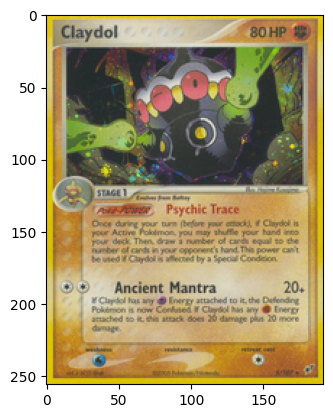

In [27]:
# Run unit test for test_resize()
unittest.main(argv=[''], verbosity=2, exit=False)

Download and resize the images

In [28]:
def download_and_preprocess(n: int = None):

  pokemon_cards = load_dataset(DATASET)

  iterations = 0

  for row in pokemon_cards['train']:
    if n and iterations >= n: break

    try:
      img_data = requests.get(row['image_url']).content
    except requests.exceptions.RequestException:
      print('Error scraping from ', row['image_url'])
      continue

    preprocessed_img = resize(img_data)

    img_byte_arr = BytesIO()
    preprocessed_img.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    with open(f'{path}/img-{iterations}.png', 'wb') as handler:
        iterations += 1
        handler.write(img_byte_arr)

In [30]:
# Assert the files are downloaded
class TestNotebook(unittest.TestCase):
    def test_download(self):
        download_and_preprocess(n=10)
        num_files_in_dir = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        self.assertEqual(num_files_in_dir, 10)

In [31]:
# Run unit test for test_download()
unittest.main(argv=[''], verbosity=2, exit=False)

test_download (__main__.TestNotebook.test_download) ... ok

----------------------------------------------------------------------
Ran 1 test in 2.384s

OK
